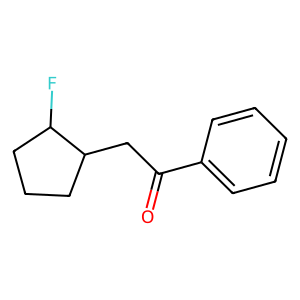

In [2]:
import sys
sys.path.append(sys.path[0].replace('/Development Notebooks',''))
import rdkit
from rdkit import Chem, rdBase
from rdkit.Chem import BRICS
from rdkit.Chem import AllChem #used for 3d coordinates
from rdkit.Chem import Draw,rdDepictor
from rdkit.Chem.Draw import IPythonConsole, rdMolDraw2D
from rdkit.Chem.Scaffolds import rdScaffoldNetwork # scaffolding
from rdkit import RDPaths
from rdkit.Chem.Draw import rdMolDraw2D
import math
import matplotlib as mpl
from matplotlib import pyplot as plt
import os
import pyvis
import re
from pyvis.network import Network
import inspect
from IPython import display
from IPython.display import SVG
import pandas as pd #lots of work with data frames
from rdkit.Chem import PandasTools # Smiles and molecule  integration with Pandas
from rdkit.Chem import rdqueries # search for rdScaffoldAttachment points * to remove
import numpy as np #for arrays in fragment identification
from src import fragfunctions as ff
from src.utils import get_canonical_molecule

mol = get_canonical_molecule('O=C(CC1CCCC1F)c2ccccc2')
Draw.MolToImage(mol)

# Summary

Notebook working in to develop connectivity features for fragmenting

In [ ]:
molFrame = ff.generate_full_molFrame(mol)

[14:36:54] Running LargestFragmentChooser
[14:36:54] Fragment: O=C(CC1CCCC1F)c1ccccc1
[14:36:54] New largest fragment: O=C(CC1CCCC1F)c1ccccc1 (30)


In [ ]:
ff.trim_molpart(molFrame,molFrame['molPart'].unique(),mol)

[8, 2, 7]
[[1, 1], [2, 2], [3, 3]]


{'smiles': ['[1*]C(=O)C[2*]', '[1*]c1ccccc1', '[2*]C1CCCC1[3*]', '[3*]F'],
 'count': 4}

In [ ]:
molFrame

,atomNum,inRing,molPart
0,8,False,Linker 1
1,6,False,Linker 1
2,6,False,Linker 1
3,6,True,Ring 1
4,6,True,Ring 1
5,6,True,Ring 1
6,6,True,Ring 1
7,6,True,Ring 1
8,9,False,Peripheral 1
9,6,True,Ring 2


In [ ]:
ff.trim_connections(molFrame,'Ring 1',[0,6],mol,1,{})

{'smiles': '*.*1CCCC1 |$1;1;;;;$|',
 'count': 2,
 'connectivityDict': {'Ring 1': {'Linker 1': 1}}}

In [ ]:
fragFrame = ff.identify_connected_fragments('O=C(CC1CCCC1F)c2ccccc2')

[8, 2, 7]
[[1, 1], [2, 2], [3, 3]]


[14:36:54] Running LargestFragmentChooser
[14:36:54] Fragment: O=C(CC1CCCC1F)c1ccccc1
[14:36:54] New largest fragment: O=C(CC1CCCC1F)c1ccccc1 (30)


,Smiles,Molecule,xyz,numAttachments
0,[3*]F,,2\n\nAt 1.057329 0.000000 0.000000\n...,1
1,[2*]C1CCCC1[3*],,15\n\nAt 1.632900 -0.283778 1.968666\...,2
2,[1*]C([4*])=O,,4\n\nAt 1.968241 -0.789497 -0.184166\n...,2
3,[2*]C[4*],,5\n\nAt 1.886032 1.039284 -0.015414\n...,2
4,[1*]c1ccccc1,,12\n\nAt 3.544084 -0.102849 0.027364\...,1

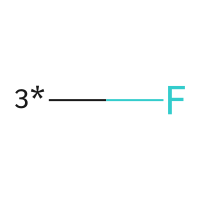
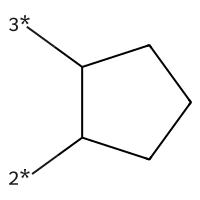
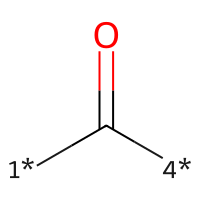
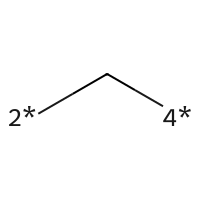
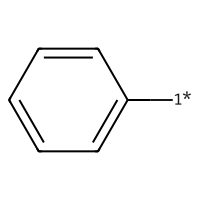

In [ ]:
testMol = fragFrame['Molecule'][2]
fragFrame

In [ ]:
fragFrame = ff.identify_connected_fragments('Cc1nc2ccc(cc2s1)NC(=O)c3cc(ccc3N4CCCC4)S(=O)(=O)N5CCOCC5')

[0, 6, 9, 12, 24, 15]
[[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6]]


[14:36:54] Running LargestFragmentChooser
[14:36:54] Fragment: Cc1nc2ccc(NC(=O)c3cc(S(=O)(=O)N4CCOCC4)ccc3N3CCCC3)cc2s1
[14:36:54] New largest fragment: Cc1nc2ccc(NC(=O)c3cc(S(=O)(=O)N4CCOCC4)ccc3N3CCCC3)cc2s1 (59)


In [ ]:
fragFrame = ff.identify_connected_fragments('c1ccc(c(c1)c2ccc(o2)C(=O)N3C[C@H](C4(C3)CC[NH2+]CC4)C(=O)NCCOCCO)F')

[14:36:54] Running LargestFragmentChooser
[14:36:54] Fragment: O=C(NCCOCCO)[C@@H]1CN(C(=O)c2ccc(-c3ccccc3F)o2)CC12CC[NH2+]CC2
[14:36:54] New largest fragment: O=C(NCCOCCO)[C@@H]1CN(C(=O)c2ccc(-c3ccccc3F)o2)CC12CC[NH2+]CC2 (64)


[8, 11, 13, 17, 23]
[[1, 1], [2, 2], [3, 3], [4, 4], [5, 5]]


,Smiles,Molecule
0,[4*]CCO,
1,[5*]N[5*],
2,[14*]c1ccc([14*])o1,
3,[4*]CC[4*],
4,[1*]C([6*])=O,
5,[5*]N1C[C@@H]([15*])C2(CC[NH2+]CC2)C1,
6,[16*]c1ccccc1F,
7,[3*]O[3*],

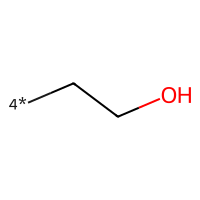
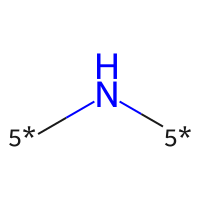
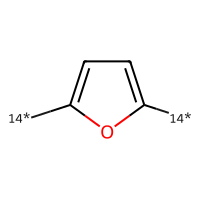
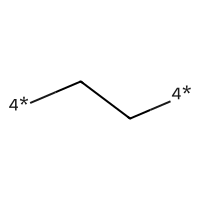
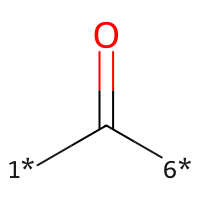
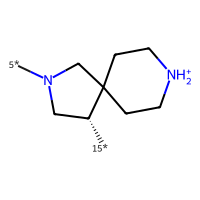
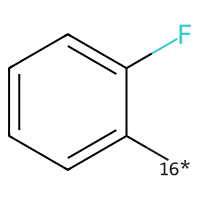
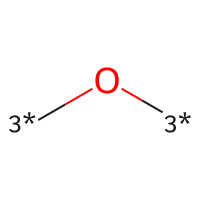

In [ ]:
ff.generate_fragment_frame(list(BRICS.BRICSDecompose(Chem.MolFromSmiles('c1ccc(c(c1)c2ccc(o2)C(=O)N3C[C@H](C4(C3)CC[NH2+]CC4)C(=O)NCCOCCO)F'))))

In [ ]:
uniqueframe = ff.count_uniques(fragFrame,dropAttachements=False)
uniqueframe[uniqueframe['Smiles']=='*CC*']['count'][0]

['*CC*', '*F', '*c1ccccc1*', '*c1ccc(*)o1', '*NC(*)=O']
0


2

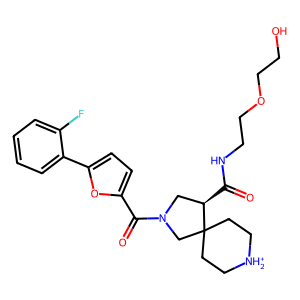

In [ ]:
Draw.MolToImage(Chem.MolFromSmiles('c1ccc(c(c1)c2ccc(o2)C(=O)N3C[C@H](C4(C3)CC[NH2+]CC4)C(=O)NCCOCCO)F'))

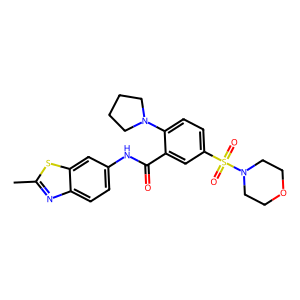

In [ ]:
Draw.MolToImage(Chem.MolFromSmiles('Cc1nc2ccc(cc2s1)NC(=O)c3cc(ccc3N4CCCC4)S(=O)(=O)N5CCOCC5'))

[14:36:55] Running LargestFragmentChooser
[14:36:55] Fragment: O=C(NCCOCCO)[C@@H]1CN(C(=O)c2ccc(-c3ccccc3F)o2)CC12CC[NH2+]CC2
[14:36:55] New largest fragment: O=C(NCCOCCO)[C@@H]1CN(C(=O)c2ccc(-c3ccccc3F)o2)CC12CC[NH2+]CC2 (64)


[8, 11, 13, 17, 23]
[[1, 1], [2, 2], [3, 3], [4, 4], [5, 5]]


[14:36:55] Running LargestFragmentChooser
[14:36:55] Fragment: Cc1nc2ccc(NC(=O)c3cc(S(=O)(=O)N4CCOCC4)ccc3N3CCCC3)cc2s1
[14:36:55] New largest fragment: Cc1nc2ccc(NC(=O)c3cc(S(=O)(=O)N4CCOCC4)ccc3N3CCCC3)cc2s1 (59)


['*CC*', '*F', '*c1ccccc1*', '*c1ccc(*)o1', '*NC(*)=O']
0
[0, 6, 9, 12, 24, 15]
[[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6]]
[1]
[4]
                         Smiles  \
0                          *CC*   
1                            *F   
2                    *c1ccccc1*   
3                   *c1ccc(*)o1   
4                      *NC(*)=O   
5                       *C(*)=O   
6                            *O   
7                           *O*   
8  *[C@@H]1CN(*)CC12CC[NH2+]CC2   

                                        Molecule  count  
0  <rdkit.Chem.rdchem.Mol object at 0x16a0c7a00>      2  
1  <rdkit.Chem.rdchem.Mol object at 0x16a0c7a70>      1  
2  <rdkit.Chem.rdchem.Mol object at 0x16a0c7140>      1  
3  <rdkit.Chem.rdchem.Mol object at 0x16a0c7ae0>      1  
4  <rdkit.Chem.rdchem.Mol object at 0x16a0c7f40>      1  
5  <rdkit.Chem.rdchem.Mol object at 0x16a0c71b0>      1  
6  <rdkit.Chem.rdchem.Mol object at 0x16a1b80b0>      1  
7  <rdkit.Chem.rdchem.Mol object at 0x16a1b8200>

,Smiles,count,Molecule
0,*NC(*)=O,2,
1,*CC*,2,
2,*F,1,
3,*c1ccccc1*,1,
4,*c1ccc(*)o1,1,
5,*C(*)=O,1,
6,*O,1,
7,*O*,1,
8,*[C@@H]1CN(*)CC12CC[NH2+]CC2,1,
9,*c1ccc(*)c(*)c1,1,

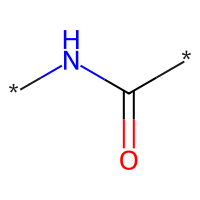
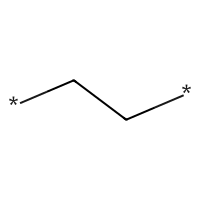
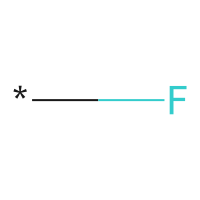
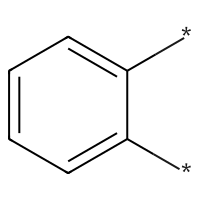
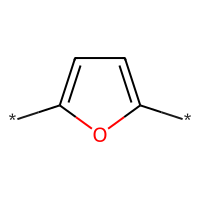
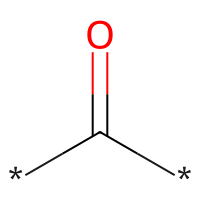
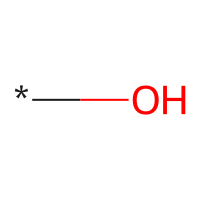
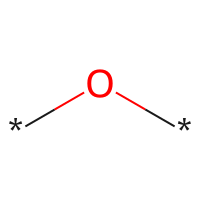
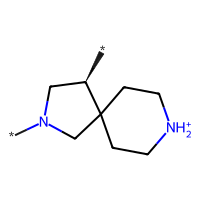
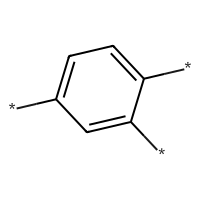
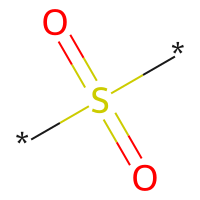
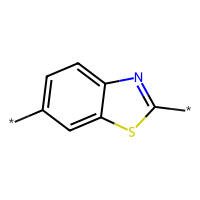
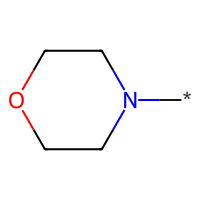
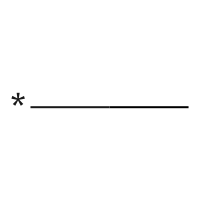
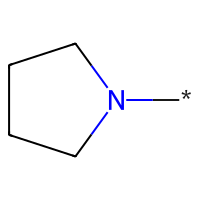

In [ ]:
ff.count_groups_in_set(['c1ccc(c(c1)c2ccc(o2)C(=O)N3C[C@H](C4(C3)CC[NH2+]CC4)C(=O)NCCOCCO)F','Cc1nc2ccc(cc2s1)NC(=O)c3cc(ccc3N4CCCC4)S(=O)(=O)N5CCOCC5'],dropAttachements=False)

In [ ]:
Chem.MolToSmiles(Chem.MolFromSmiles('*C(=O)N*'))

'*NC(*)=O'